✅ Project Title:
"Customer Segmentation and Churn Insights for Targeted Retention Strategy"

🎯 Project Goal:
To analyze customer behaviors and profiles, identify potential churn risks, and provide insights to improve retention and marketing strategies.

📂 Dataset Summary:
The dataset includes:

ID, Year_Birth, Education, Marital_Status

Income, Spending in different product categories (e.g., Wines, Fruits)

Recency: Days since last purchase

NumDealsPurchases, NumWebPurchases, etc.

AcceptedCmp1-5: Marketing campaign responses

Complain, Response, Dt_Customer: Registration date

In [215]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [148]:
#import file
df = pd.read_csv(r"C:\Users\RenukaHebasur\churn analysis\marketing_campaign.csv", delimiter='\t')
print(df)

         ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2012       58       635  ...            

In [149]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [150]:
#Data Cleaning
df["Dt_Customer"]= pd.to_datetime(df['Dt_Customer'], dayfirst=True)

df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [151]:
df = df.dropna(subset=['Income'])
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [152]:
#feature engineering

#1.customer_age
df["age"] = 2025-df["Year_Birth"] 

#2.customer_since_with_us
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True) 
df["customer_since"] = 2025-df["Dt_Customer"].dt.year

#3.Total_spend
spend_cols = ['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']
df["total_spend"] = df[spend_cols].sum(axis=1)

# 4. Family Size
df['Family_Size'] = df['Kidhome'] + df['Teenhome']

# 5. Campaigns Accepted
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
df['Campaign_Accepted'] = df[campaign_cols].sum(axis=1)

# 6. Is Engaged
df['Is_Engaged'] = df['Response']
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Z_CostContact,Z_Revenue,Response,age,customer_since,total_spend,Family_Size,Campaign_Accepted,Is_Engaged
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,3,11,1,68,13,1617,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,3,11,0,71,11,27,2,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,3,11,0,60,12,776,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,3,11,0,41,11,53,1,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,3,11,0,44,11,422,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,3,11,0,58,12,1341,1,0,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,3,11,0,79,11,444,3,1,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,3,11,0,44,11,1241,0,1,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,3,11,0,69,11,843,1,0,0


In [266]:
# Export cleaned dataframe to CSV
df.to_csv('cleaned_market_campaign_data.csv', index=False)


C:\Users\RenukaHebasur\AppData\Local\Temp\ipykernel_2324\3657377830.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Age_Group', y='total_spend', data=df, palette=palette)
C:\Users\RenukaHebasur\AppData\Local\Temp\ipykernel_2324\3657377830.py:19: UserWarning: The palette list has more values (9) than needed (6), which may not be intended.
  sns.boxplot(x='Age_Group', y='total_spend', data=df, palette=palette)


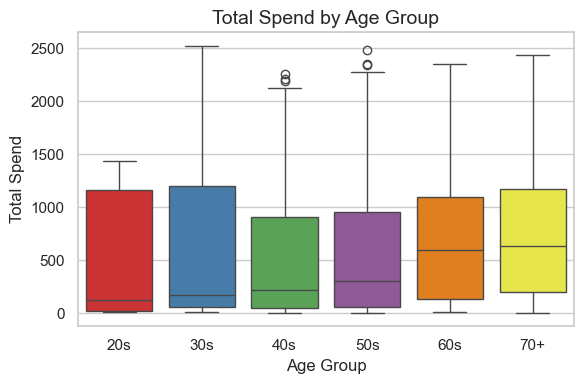

In [186]:
#EDA & Visualization (Key Areas)

#1.Plot Age vs Total Spending (scatter plot)

# Age groups
bins = [20, 30, 40, 50, 60, 70, 100]
labels = ['20s', '30s', '40s', '50s', '60s', '70+']
df['Age_Group'] = pd.cut(df['age'], bins=bins, labels=labels)

# Drop NaNs from age group
df = df.dropna(subset=['Age_Group'])

# Set vibrant color palette
sns.set(style="whitegrid")
palette = sns.color_palette("Set1")  # Vibrant color set

# Plot
plt.figure(figsize=(6, 4))
sns.boxplot(x='Age_Group', y='total_spend', data=df, palette=palette)

# Labels
plt.title('Total Spend by Age Group', fontsize=14)
plt.xlabel('Age Group')
plt.ylabel('Total Spend')
plt.tight_layout()
plt.show()

We can visualize how age correlates with total spending by creating a box plot. 

<Figure size 1000x600 with 0 Axes>

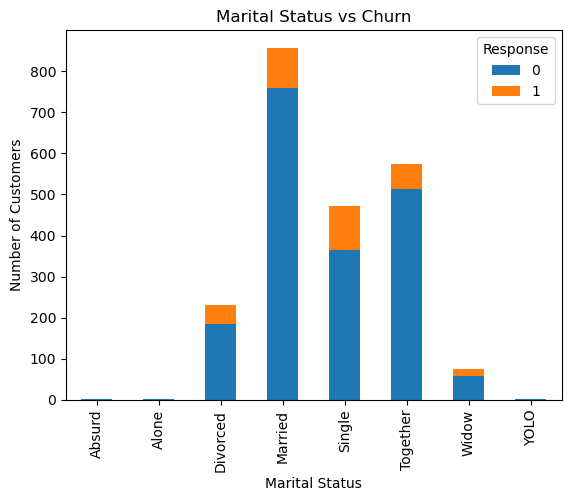

<Figure size 1000x600 with 0 Axes>

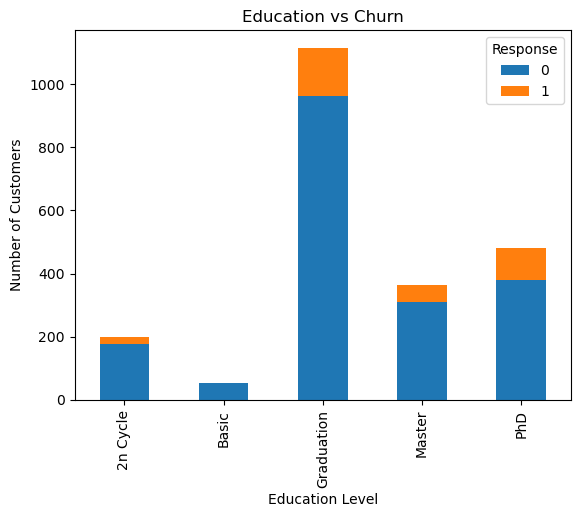

In [155]:
#2.Marital Status vs Response (Churn)
plt.figure(figsize=(10, 6))
df.groupby(['Marital_Status', 'Response']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Marital Status vs Churn')
plt.xlabel('Marital Status')
plt.ylabel('Number of Customers')
plt.show()

# Education vs Response (Churn)
plt.figure(figsize=(10, 6))
df.groupby(['Education', 'Response']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Education vs Churn')
plt.xlabel('Education Level')
plt.ylabel('Number of Customers')
plt.show()


0 → The customer did not respond to the last campaign.

1 → The customer responded positively (i.e., accepted the offer or made a purchase) as a result of the last campaign.

We can visualize how marital status and education affect customer churn (Response) using bar plots or stacked bar plots


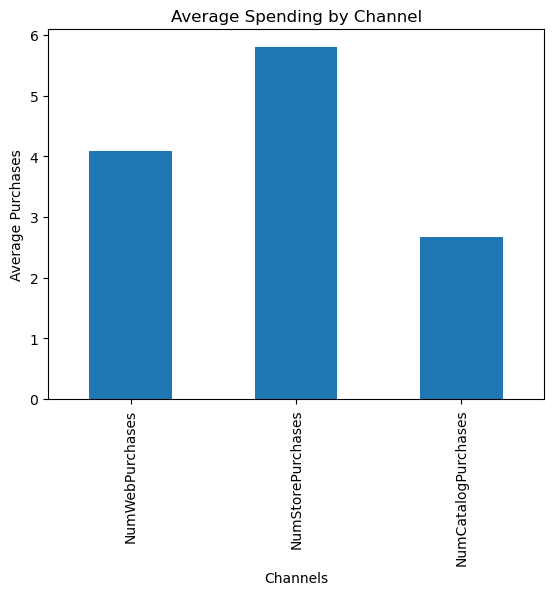

In [157]:
#3.Spending by channel (Web, Store, Catalog)
df[['NumWebPurchases', 'NumStorePurchases', 'NumCatalogPurchases']].mean().plot(kind='bar')
plt.title('Average Spending by Channel')
plt.ylabel('Average Purchases')
plt.xlabel('Channels')
plt.show()


This visualization shows how customers spending patterns differ based on their interaction channel.

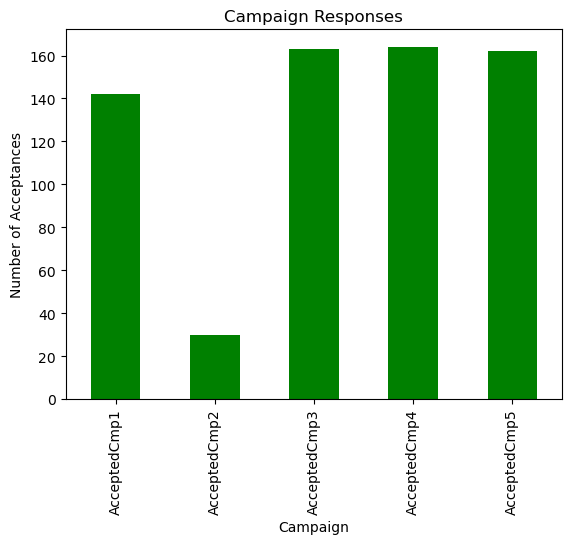

In [158]:
# 4. Plot the acceptance of each campaign
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
df[campaign_columns].sum().plot(kind='bar', color='green')
plt.title('Campaign Responses')
plt.ylabel('Number of Acceptances')
plt.xlabel('Campaign')
plt.show()


This visualize shows how customers respond to campaigns. The plot responses for each campaign to see the significant difference.

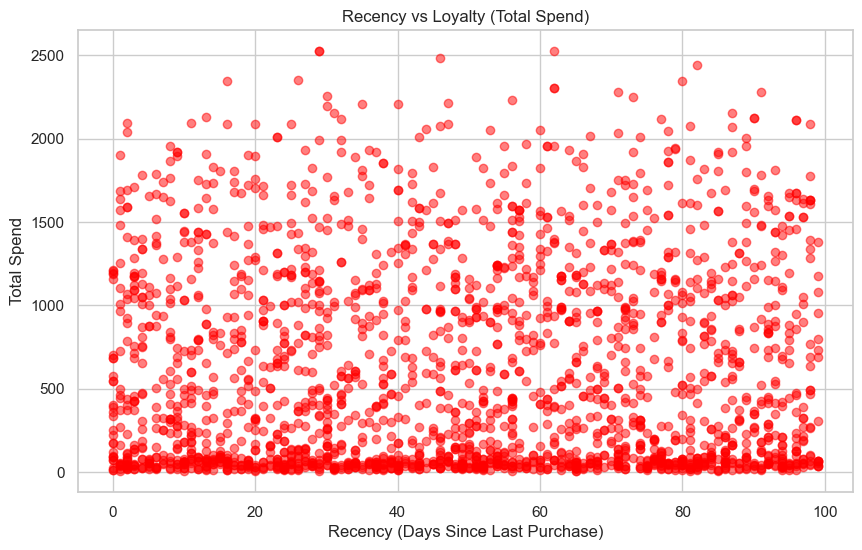

In [196]:
# 5.Plot Recency vs Loyalty (Total Spend)
plt.figure(figsize=(10, 6))
plt.scatter(df['Recency'], df['total_spend'], alpha=0.5, c='red')
plt.title('Recency vs Loyalty (Total Spend)')
plt.xlabel('Recency (Days Since Last Purchase)')
plt.ylabel('Total Spend')
plt.show()

Here, we can visualize the relationship between Recency (time since last purchase) and Loyalty (e.g., frequency of purchases or spending).

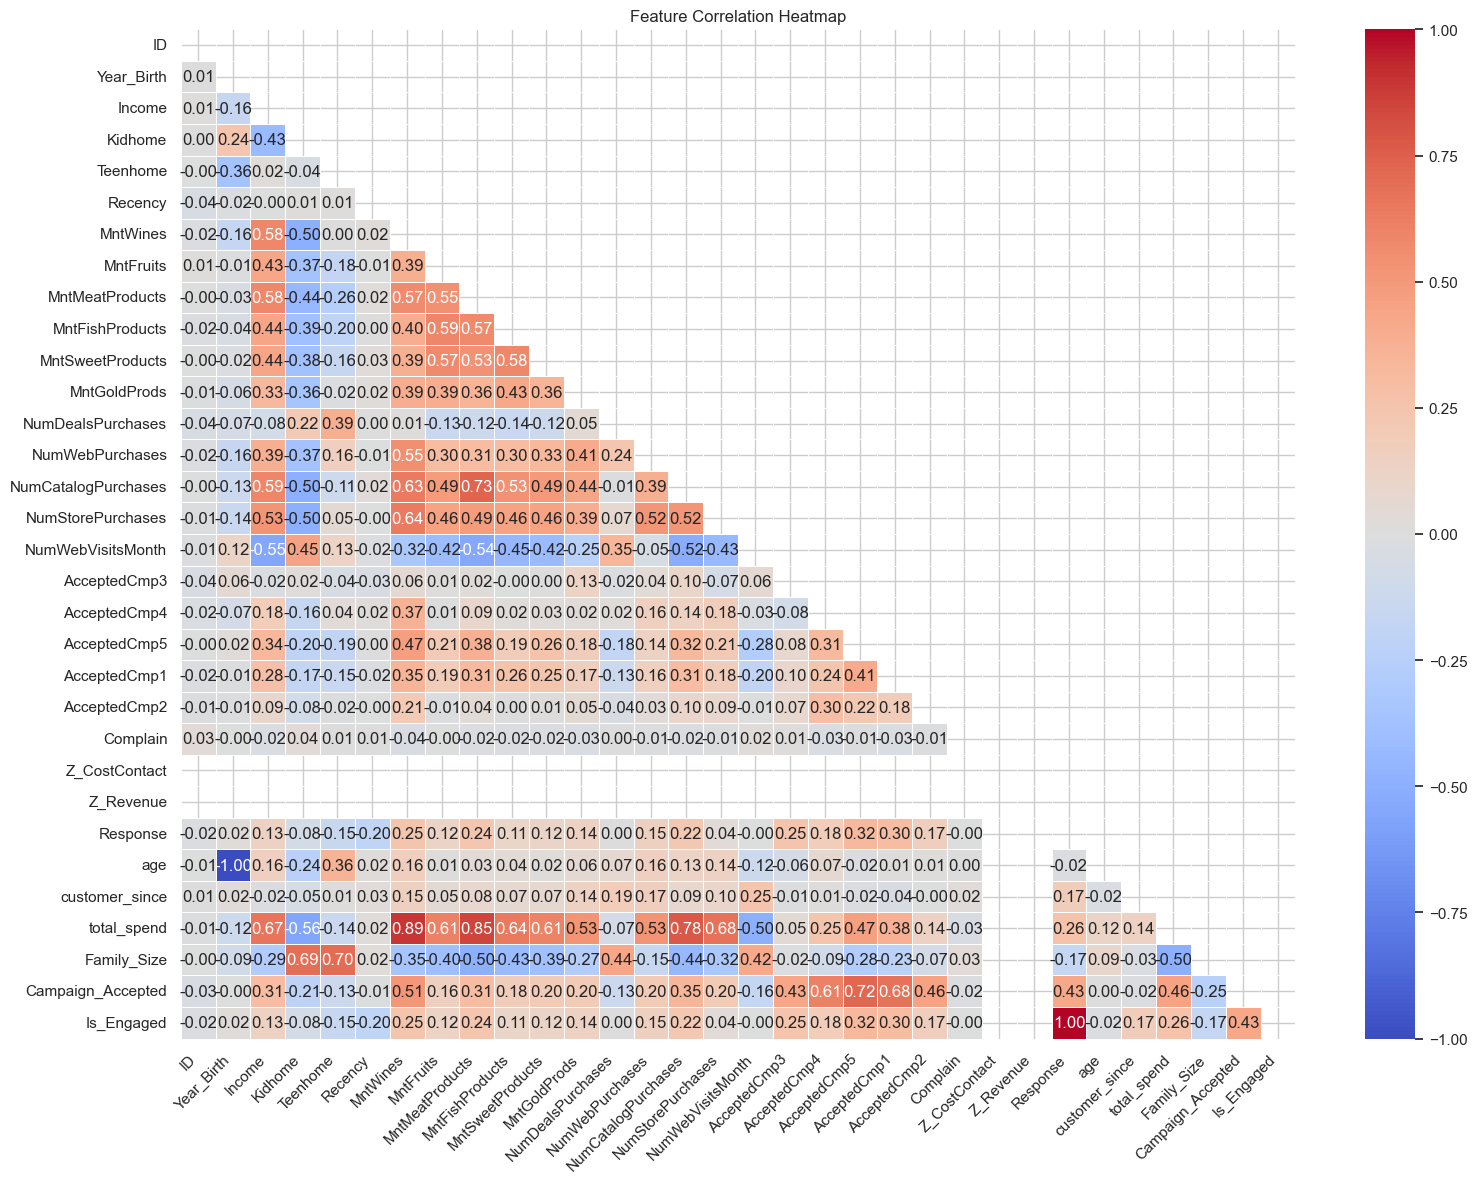

In [219]:
# 6. Calculate correlation matrix
numeric_df = df.select_dtypes(include='number')

# Compute correlation matrix
corr = numeric_df.corr()

# Create mask for upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plot heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', mask=mask, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

A correlation heatmap shows how strongly numerical features are related to each other. In this case, it's helps to understand which features move together in the customer churn dataset.

🔍 Interpretation:
Values range from -1 to +1:

+1: Strong positive correlation → as one variable increases, so does the other.

-1: Strong negative correlation → as one increases, the other decreases.

0: No correlation.

Colors (in coolwarm palette):

Red/Orange: Strong positive relationship.

Blue: Strong negative relationship.

White/light: No clear relationship.

3. customer segmentation

In [223]:
segment_cols = [
    'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
    'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
    'NumStorePurchases', 'NumWebVisitsMonth'
]


In [229]:
from sklearn.preprocessing import StandardScaler

#Handling missing values and scale

df_seg = df[segment_cols].dropna()  # drop rows with missing values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_seg)


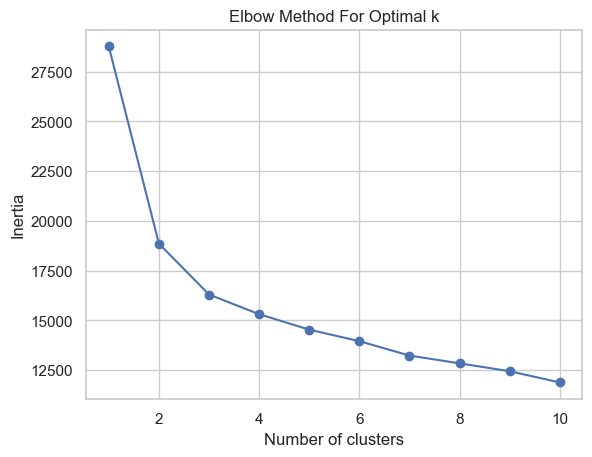

In [231]:
#Elbow Method

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()


In [233]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['Segment'] = kmeans.fit_predict(X_scaled)


In [235]:
df.groupby('Segment')[segment_cols].mean()


,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
Segment,,,,,,,,,,,,,
0,78370.876263,49.785354,563.505051,83.757576,504.457071,120.325758,83.845960,85.414141,1.401515,5.058081,6.222222,8.219697,2.664141
1,49755.726471,47.764706,333.573529,12.132353,94.870588,19.191176,13.511765,57.052941,5.147059,6.352941,2.152941,6.055882,7.050000
2,34829.707194,49.132725,38.477204,4.739615,20.663627,7.047619,4.973658,14.457953,1.860182,1.983789,0.531915,3.195542,6.322188
3,67899.632653,48.989796,613.806122,33.232653,238.922449,45.218367,34.942857,60.579592,2.051020,5.969388,4.471429,8.936735,4.255102


In [243]:
#Segment	Type	Key Traits
0	#Affluent, Heavy Spenders,	High income, heavy spenders, multi-channel buyers
1	#Deal Seekers,	Mid-income, moderate spending, online and catalog-focused
2	#Low Income, Low Engagemen,	Very low spenders, low activity, likely disengaged
3	#High Income, Focused Shoppers,	High spenders, store-focused, especially on premium categories

3

✅ 1. Interpretation of Cluster Results (Spending & Engagement)
We’ll compare segments visually to highlight spending behavior and channel engagement.

📊 2. Plots for Better Understanding
Here are two useful visualizations:

<Figure size 1200x600 with 0 Axes>

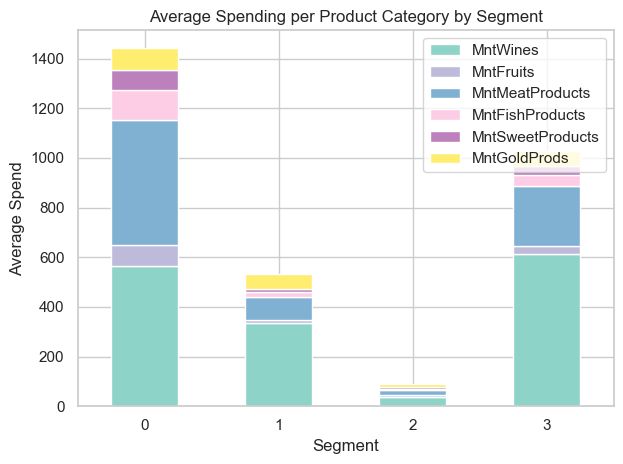

In [246]:
#A. Average Spending per Category by Segment

# Choose relevant spending columns
spend_cols = ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
avg_spend_per_segment = df.groupby("Segment")[spend_cols].mean()

# Plot
plt.figure(figsize=(12,6))
avg_spend_per_segment.plot(kind='bar', stacked=True, colormap='Set3')
plt.title("Average Spending per Product Category by Segment")
plt.ylabel("Average Spend")
plt.xlabel("Segment")
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

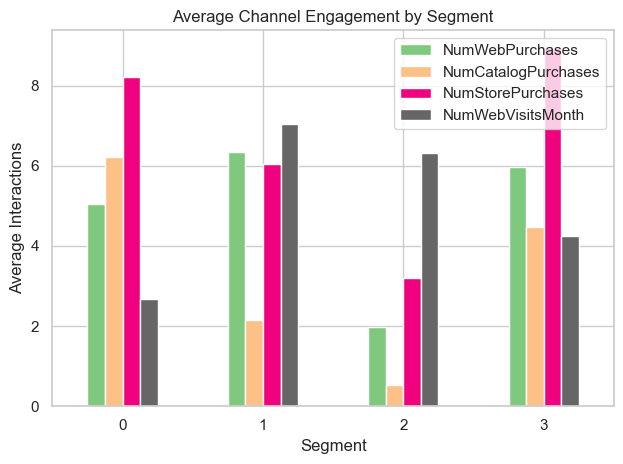

In [250]:
#B. Channel Engagement by Segment
engage_cols = ["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "NumWebVisitsMonth"]
avg_engage_per_segment = df.groupby("Segment")[engage_cols].mean()

# Plot
plt.figure(figsize=(10,6))
avg_engage_per_segment.plot(kind='bar', colormap='Accent')
plt.title("Average Channel Engagement by Segment")
plt.ylabel("Average Interactions")
plt.xlabel("Segment")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


✅ 3. Response Rate (Churn) by Segment
This shows how likely customers from each segment are to respond to a campaign (Response = 1).

C:\Users\RenukaHebasur\AppData\Local\Temp\ipykernel_2324\3608100183.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Segment", y="Response", data=response_rate, palette="coolwarm")


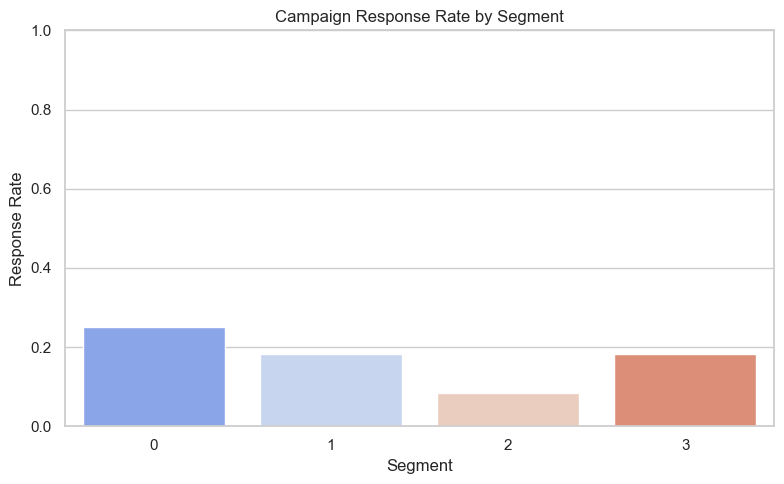

In [253]:
#📊 A. Response Rate per Segment
# Calculate response rate per segment
response_rate = df.groupby("Segment")["Response"].mean().reset_index()

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x="Segment", y="Response", data=response_rate, palette="coolwarm")
plt.title("Campaign Response Rate by Segment")
plt.ylabel("Response Rate")
plt.xlabel("Segment")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


🧠 Interpretation:

A higher response rate means the segment is more engaged or easier to convert.

Useful for targeting marketing campaigns.



✅ 4. Radar Chart for Cluster Profile: A radar/spider chart can help visualize multiple features per segment on one circular plot

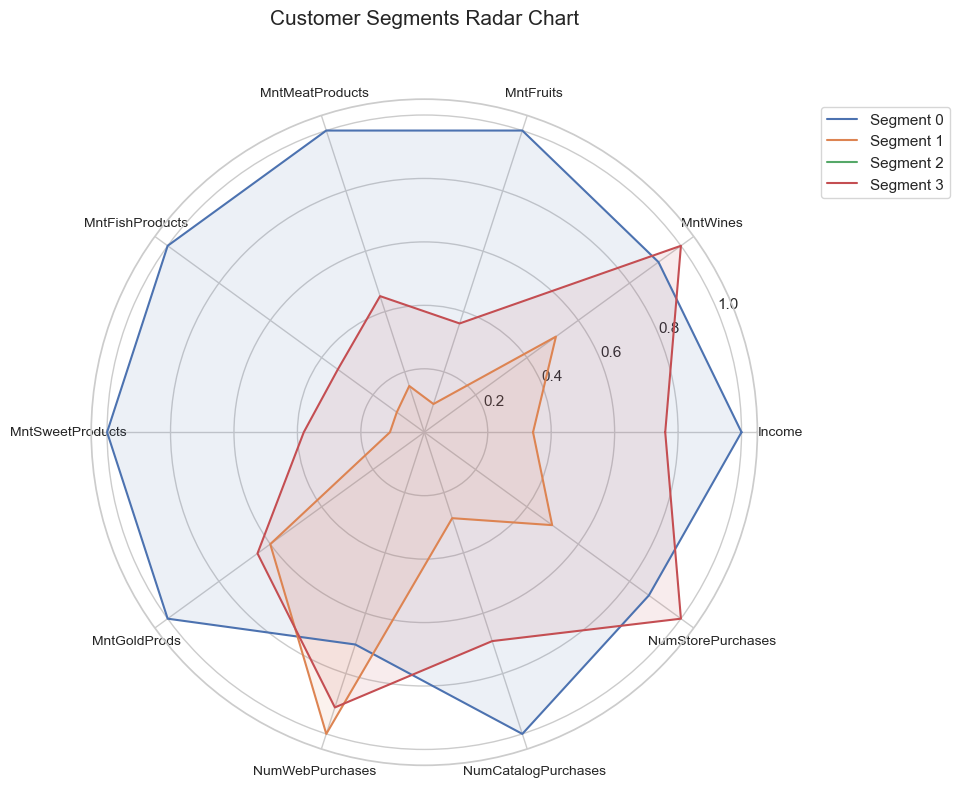

In [261]:
from math import pi

# Select features to include in the radar chart
features = ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 
            'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
            'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

# Get mean values per cluster
cluster_means = df.groupby('Segment')[features].mean()

# Normalize the data (0 to 1) for better visualization
normalized_data = (cluster_means - cluster_means.min()) / (cluster_means.max() - cluster_means.min())

# Number of variables
categories = list(normalized_data.columns)
N = len(categories)

# Set up the radar plot
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]  # complete the loop

# Initialize the radar chart
plt.figure(figsize=(10, 8))
ax = plt.subplot(111, polar=True)

# Plot each cluster
for i, row in normalized_data.iterrows():
    values = row.tolist()
    values += values[:1]  # repeat first value to close the circle
    ax.plot(angles, values, label=f"Segment {i}")
    ax.fill(angles, values, alpha=0.1)

# Add feature labels
plt.xticks(angles[:-1], categories, fontsize=10)
plt.title("Customer Segments Radar Chart", size=15, y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.tight_layout()
plt.show()


🔍 Project Conclusion: Customer Segmentation Analysis
Using clustering techniques on customer behavioral and demographic data, we identified 4 distinct customer segments:

Segment 0 – Premium Loyal Customers
High income, highest spending across all product categories

Prefer store purchases but also engage in catalogs and web

Low deal sensitivity, low web visit frequency

Business strategy: Offer exclusive loyalty programs, VIP rewards, premium upselling

Segment 1 – Deal Seekers / Average Spenders
Mid income, moderate overall spending

High catalog & web purchase activity

Very responsive to deals

Business strategy: Target with frequent promotions, personalized online deals, seasonal campaigns

Segment 2 – Low Income, Low Engagement
Lowest income and spending

Least engaged across all channels

High web visit frequency but low conversions

Business strategy: Use email campaigns with low-cost bundled offers or free trials to re-engage

Segment 3 – Affluent Impulse Shoppers
High income, spends heavily on wines & meat

Mix of store and web purchases

Moderate deal sensitivity

Business strategy: Target with luxury product bundles, gourmet loyalty rewards, and upsell cross-categories

📊 Overall Insights
Customer behavior varies significantly by income, recency, and preferred channels

Churn (response variable) is more influenced by spending patterns and engagement than by marital status or education alone

Segmentation allows more targeted marketing strategies instead of one-size-fits-all promotions

